In [ ]:
!pip install --upgrade plotly
!pip install --upgrade geopandas

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)
Requirement already up-to-date: geopandas in /usr/local/lib/python3.7/dist-packages (0.9.0)


In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/crime/01_District_wise_crimes_committed_IPC_2001_2012.csv')

# EDA

In [ ]:
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,30,16,9,0,41,198,199,22,177,78,16,104,1,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,30,23,8,0,16,191,366,57,309,168,11,65,8,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,34,25,4,0,14,237,723,164,559,156,33,209,9,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,20,5,1,0,4,98,173,36,137,164,12,37,2,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,26,23,4,0,25,437,1021,150,871,70,50,220,3,41,1244,12,109,58,247,0,431,2313,6507


In [ ]:
df.shape

(9017, 33)

In [ ]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9017 non-null   object
 1   DISTRICT                                             9017 non-null   object
 2   YEAR                                                 9017 non-null   int64 
 3   MURDER                                               9017 non-null   int64 
 4   ATTEMPT TO MURDER                                    9017 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   int64 
 6   RAPE                                                 9017 non-null   int64 
 7   CUSTODIAL RAPE                                       9017 non-null   int64 
 8   OTHER RAPE                                           9017 non-null   int64 
 9

In [ ]:
df.describe()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
count,9017.000000,9017.00000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000,9017.000000
mean,2006.629034,89.28535,78.069646,9.895531,53.041366,0.005767,53.035599,79.152046,58.535433,20.616613,13.177110,7.084618,55.066430,247.829433,776.428968,281.772208,494.656759,171.881335,40.816458,170.255517,5.926140,25.219918,747.893091,20.228901,100.511257,27.515582,194.122435,0.197849,222.216702,2174.299434,5310.115116
std,3.463623,327.27503,303.446020,59.521657,190.741450,0.115223,190.725474,317.630964,246.937464,88.586415,56.778798,42.350314,220.576876,941.233426,2935.008640,1164.677928,1895.366707,685.061783,172.042434,743.536365,25.985903,98.880282,3024.106467,96.970466,394.059436,167.237522,831.986594,2.415039,936.002540,7988.438462,18524.381119
min,2001.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,18.00000,10.000000,0.000000,8.000000,0.000000,8.000000,10.000000,6.000000,1.000000,1.000000,0.000000,6.000000,31.000000,88.000000,12.000000,64.000000,11.000000,4.000000,13.000000,0.000000,2.000000,43.000000,1.000000,10.000000,0.000000,11.000000,0.000000,5.000000,265.000000,853.000000
50%,2007.000000,38.00000,28.000000,2.000000,20.000000,0.000000,20.000000,25.000000,18.000000,5.000000,3.000000,0.000000,17.000000,83.000000,217.000000,48.000000,152.000000,46.000000,11.000000,37.000000,1.000000,8.000000,199.000000,5.000000,31.000000,2.000000,47.000000,0.000000,68.000000,745.000000,2096.000000
75%,2010.000000,66.00000,56.000000,6.000000,41.000000,0.000000,41.000000,56.000000,42.000000,13.000000,9.000000,2.000000,37.000000,177.000000,466.000000,140.000000,313.000000,125.000000,28.000000,104.000000,4.000000,20.000000,529.000000,16.000000,76.000000,13.000000,135.000000,0.000000,177.000000,1608.000000,3972.000000
max,2012.000000,7601.00000,7964.000000,1616.000000,3425.000000,5.000000,3425.000000,8878.000000,7910.000000,2416.000000,1319.000000,1263.000000,6949.000000,16617.000000,53449.000000,22773.000000,35960.000000,11214.000000,4296.000000,19646.000000,599.000000,2830.000000,56768.000000,2322.000000,7118.000000,4970.000000,19865.000000,83.000000,16076.000000,124176.000000,220335.000000


In [ ]:
df.dtypes

STATE/UT                                               object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING & ABDUCTION                                  int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

In [ ]:
df.isnull().values.any()

False

In [ ]:
df=df[df['DISTRICT']=='TOTAL']

In [ ]:
df.drop(['DISTRICT'],axis=1,inplace=True)

In [ ]:
df=df.set_index(['STATE/UT'])

In [ ]:
df=df.reset_index()

In [ ]:
df

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,2001,2602,1555,136,871,0,871,1182,765,417,214,9,629,7220,16751,3051,13700,3001,788,5391,144,872,34947,420,3544,2271,5791,7,7400,34344,130089
1,ARUNACHAL PRADESH,2001,83,53,3,33,0,33,83,55,28,22,2,84,248,443,36,407,24,41,30,4,13,466,0,78,3,11,0,0,618,2342
2,ASSAM,2001,1356,481,40,817,0,817,1480,1070,410,532,14,687,2423,5367,350,5017,2953,374,575,46,441,5805,59,850,4,1248,0,2010,9315,36877
3,BIHAR,2001,3643,3419,250,888,0,888,2159,518,1641,1291,147,2203,3233,9701,1050,8651,8606,946,1659,85,502,7544,859,562,21,1558,83,2406,36667,88432
4,CHHATTISGARH,2001,880,529,45,959,0,959,207,171,36,87,19,338,4144,4812,920,3892,871,154,402,8,215,5477,70,1763,161,840,0,689,15790,38460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,CHANDIGARH,2012,21,44,5,27,0,27,87,66,21,3,9,63,235,1549,894,655,49,34,234,2,9,42,5,45,25,73,0,3,1042,3606
404,D & N HAVELI,2012,7,2,0,3,0,3,13,9,4,2,0,2,22,68,36,32,11,10,4,0,12,25,0,2,0,0,0,23,112,318
405,DAMAN & DIU,2012,3,5,0,5,0,5,3,0,3,1,0,3,26,55,42,13,9,6,8,0,11,17,0,0,0,3,0,38,46,239
406,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0,0,0,3,7,1,6,10,0,0,0,3,3,0,1,0,1,0,0,32,60


In [ ]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [ ]:
len(df['STATE/UT'].unique())

34

In [ ]:
df=df.groupby(['STATE/UT','YEAR']).sum().reset_index()
df

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,2001,13,0,0,3,0,3,2,2,0,0,0,4,64,65,4,61,13,10,8,2,4,118,0,19,1,9,0,0,323,658
1,A & N ISLANDS,2002,17,3,1,2,0,2,2,1,1,1,0,7,49,49,2,47,11,4,11,0,2,97,0,17,3,4,0,0,328,608
2,A & N ISLANDS,2003,21,4,1,2,0,2,2,2,0,2,0,7,56,60,3,57,19,3,13,0,8,110,0,9,2,7,0,0,318,644
3,A & N ISLANDS,2004,15,1,2,10,0,10,3,3,0,0,0,3,69,103,9,94,9,0,12,0,9,105,0,6,3,5,0,6,387,748
4,A & N ISLANDS,2005,14,3,3,4,0,4,2,1,1,0,0,4,68,92,6,86,4,8,13,0,6,79,0,11,1,5,0,3,362,682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,WEST BENGAL,2008,1811,1732,488,2263,0,2263,2332,1907,425,184,1055,613,462,17334,2593,14741,5425,876,2938,148,150,9033,451,2396,94,13663,5,3789,38177,105419
404,WEST BENGAL,2009,2068,2119,931,2336,0,2336,2750,2187,563,214,724,751,329,17133,3709,13424,6700,918,3298,153,344,11196,506,1942,108,16112,5,3623,38776,113036
405,WEST BENGAL,2010,2398,2111,630,2311,0,2311,3345,2764,581,288,687,798,388,19389,4123,15266,6809,1011,3260,214,331,12764,507,2465,163,17796,8,2847,49096,129616
406,WEST BENGAL,2011,2109,2242,486,2363,0,2363,4285,3711,574,236,939,760,455,21446,4642,16804,6019,1264,4171,207,413,13094,510,2363,200,19772,0,3249,56614,143197


# India Crime Visuals

## Sunburst graph

In [ ]:
fig2=px.sunburst(df,path=['STATE/UT','YEAR'],values='TOTAL IPC CRIMES',title="State and year wise segregation")
fig2.show()

## Tree map

In [ ]:
df.groupby(['YEAR']).sum().reset_index()

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,2001,35655,31013,3304,15694,0,15694,20860,13681,7179,6106,1540,19277,98153,233527,55819,177708,76057,14319,42544,1641,10484,269476,6738,33622,9656,49032,114,56750,679362,1714924
1,2002,34759,29940,3556,15970,3,15967,20527,13613,6914,6054,1774,18262,94101,230837,59234,171603,68806,13583,44173,1476,11763,263174,6687,33497,10027,49102,76,63628,709421,1731193
2,2003,32231,25535,3964,15357,1,15356,18836,12499,6337,5275,2195,17071,90929,229693,61862,167831,57254,13001,45399,2012,9305,259736,6078,32450,12220,49492,46,60270,680367,1668716
3,2004,33127,27371,3855,17682,2,17680,22118,14697,7421,5281,2205,17997,90615,254051,71809,182242,59904,13731,49617,1485,8599,275088,6900,33966,9871,56867,89,68990,718978,1778387
4,2005,32264,27564,3514,17701,7,17694,21242,14644,6598,5114,2677,17163,88015,255156,76847,178309,56174,13178,51247,2347,8404,269047,6673,33413,9759,56995,148,71064,717678,1766537
5,2006,32005,26720,3460,18725,2,18723,22549,16348,6201,4733,2929,17915,89716,256856,81585,175271,56554,13194,55763,2127,8447,262930,7481,35899,9822,61400,67,78146,752892,1820330
6,2007,31823,26871,3550,20139,1,20138,25873,19249,6624,4545,2976,18579,89163,268006,91381,176625,59828,15080,62990,2163,8993,271331,7955,37866,10783,74143,61,86538,804352,1933608
7,2008,32212,28209,3797,21001,0,21001,28694,21803,6891,4506,3083,19981,91816,297894,109012,188882,65947,16132,65086,2950,9208,283033,8043,39802,12084,79957,67,91460,839067,2044029
8,2009,31817,28669,3846,20928,2,20926,31324,24086,7238,4550,2781,21894,90337,302464,126803,175661,62885,15993,70718,2888,8702,277276,8242,38159,10891,88263,48,97686,850733,2071094
9,2010,32770,29110,3711,21665,6,21659,35232,28055,7177,4326,2584,22794,88677,307224,132509,174715,67518,16405,77154,2556,8456,287097,8248,40012,9881,92637,36,105429,910017,2173539


In [ ]:
fig3=px.treemap(df,path=['STATE/UT','YEAR'],values='TOTAL IPC CRIMES')
fig3.show()

## Year wise total crime stats

Text(0.5, 1.0, 'Year wise total crimes')

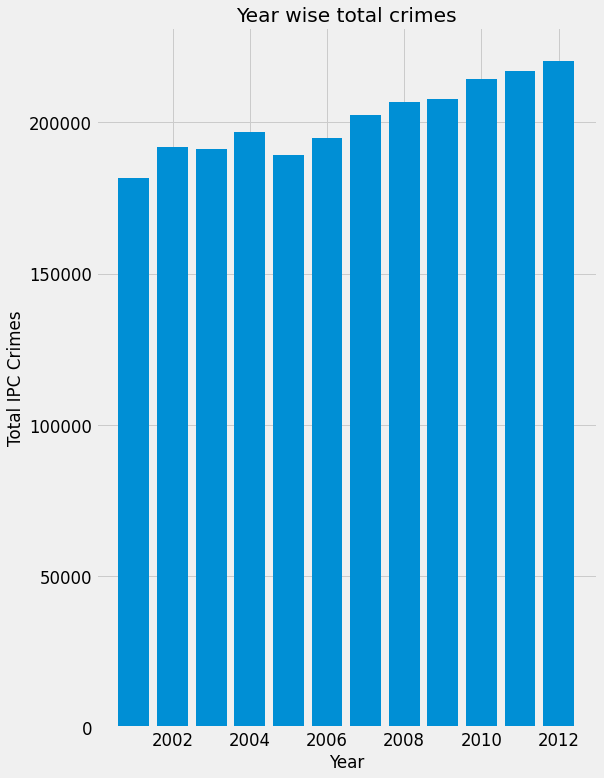

In [ ]:
plt.figure(figsize=(8,12))
plt.bar(df['YEAR'], df['TOTAL IPC CRIMES'])
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.title('Year wise total crimes')

In [ ]:
columns = ['MURDER','RAPE','KIDNAPPING & ABDUCTION','DACOITY','ROBBERY','BURGLARY','AUTO THEFT','RIOTS','CHEATING','COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY']
len(columns)

14

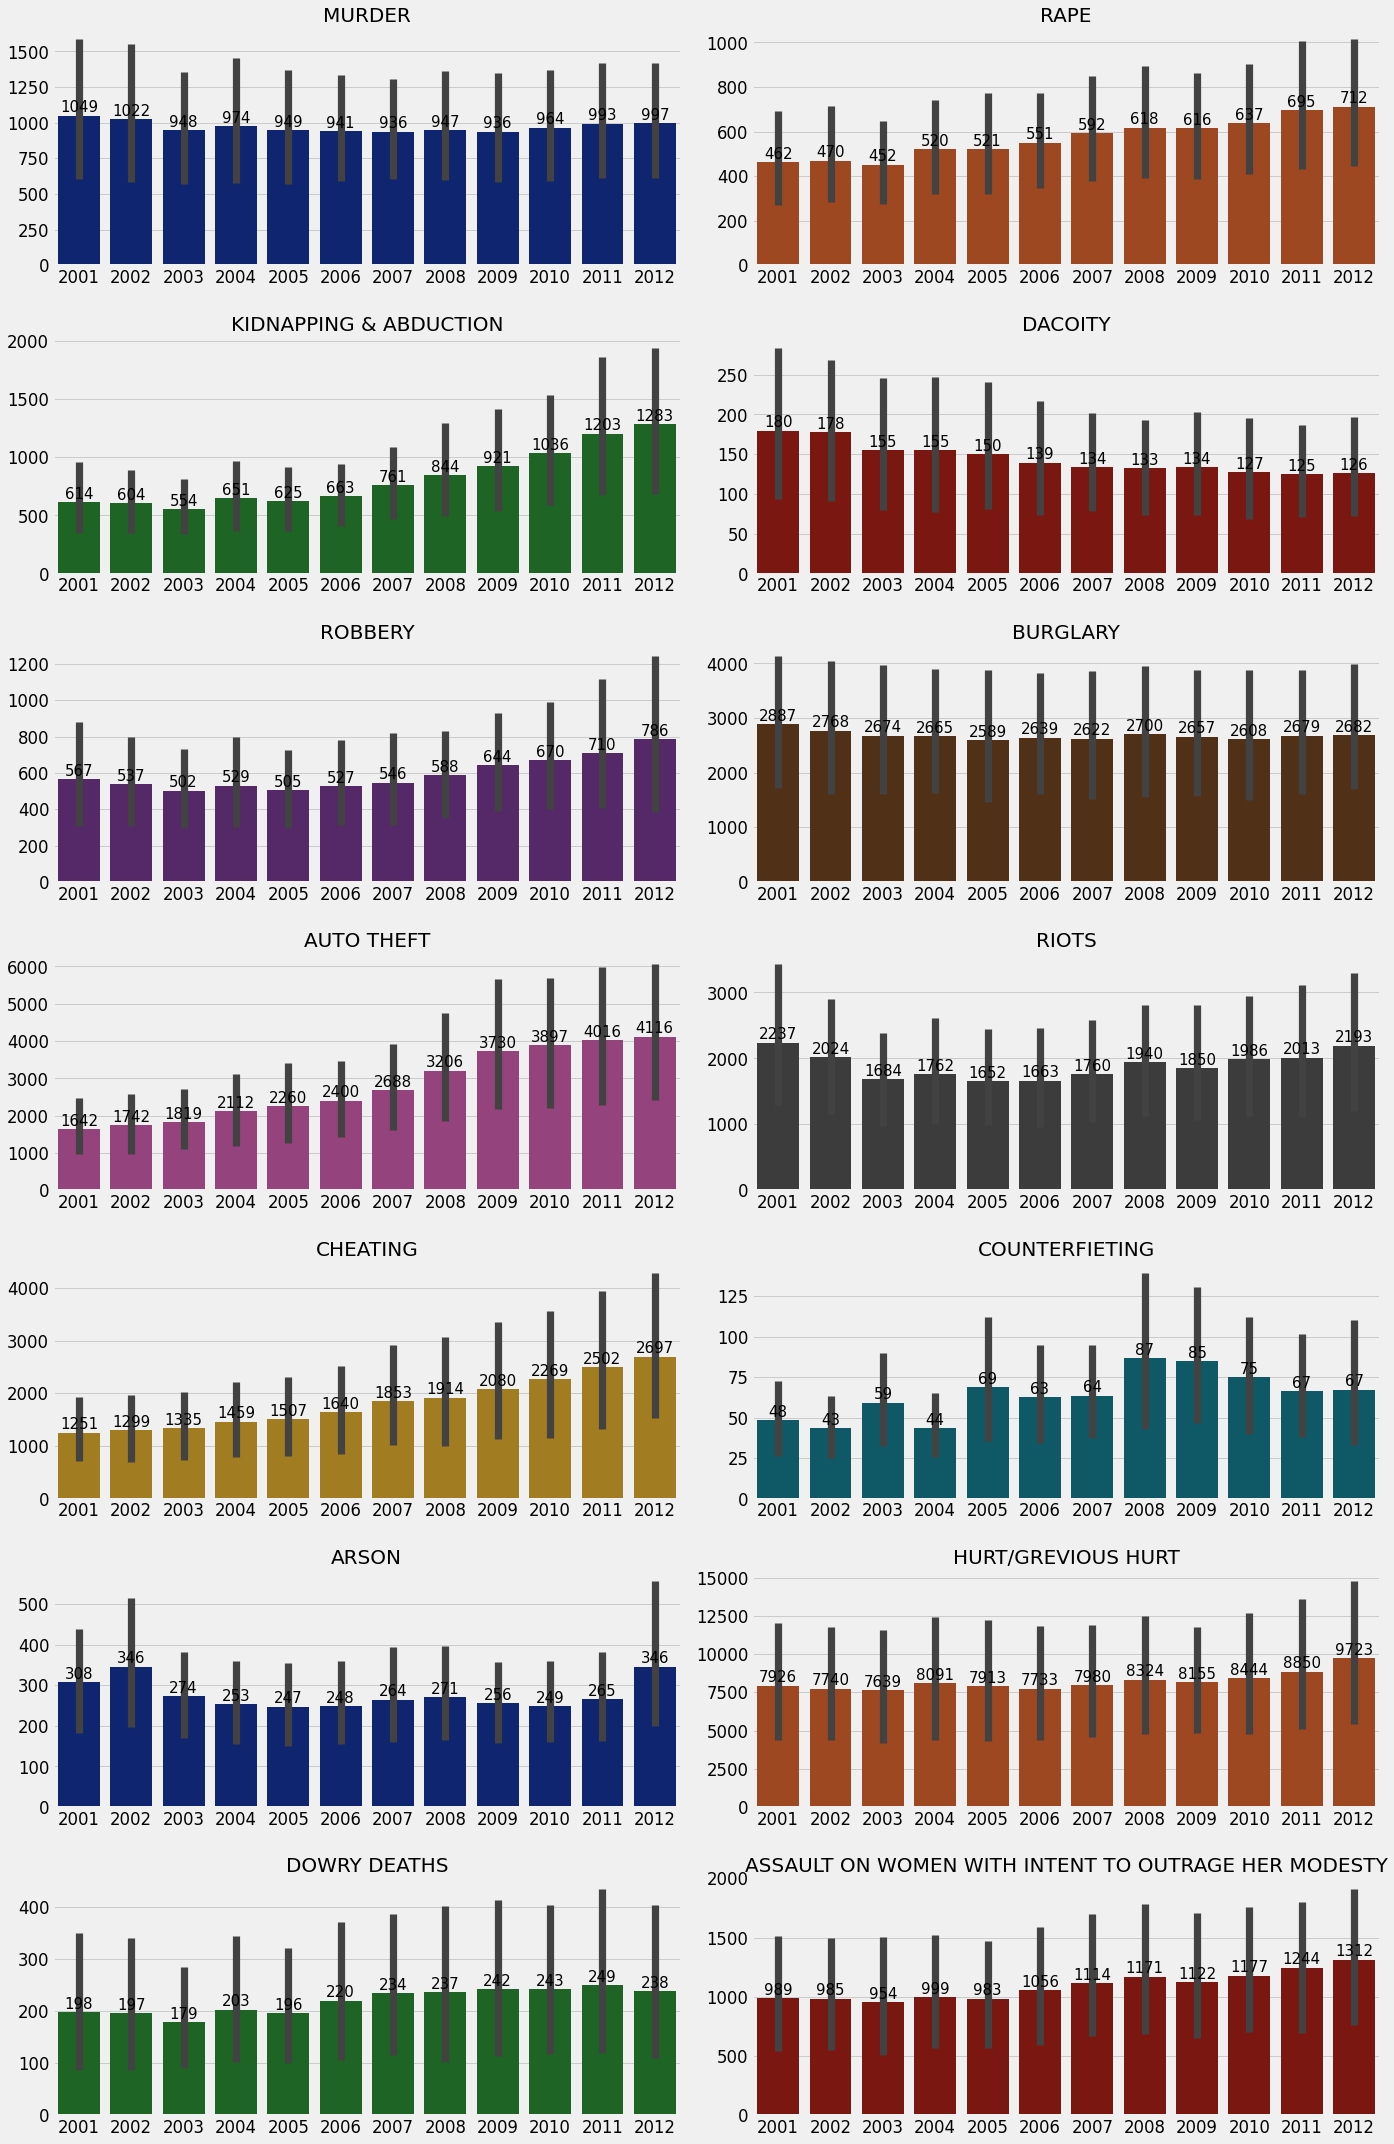

In [ ]:
import itertools
sns.set_context("talk")
plt.style.use("fivethirtyeight")
palette = itertools.cycle(sns.color_palette("dark"))
plt.figure(figsize=(20,30))
plt.style.use('fivethirtyeight')
for i,column in enumerate(columns):
    plt.subplot(7,2,i+1)
    ax= sns.barplot(data= df,x='YEAR',y= column ,color=next(palette) )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(column,size = 20)
    for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

## State wise total crime 

In [ ]:
ind=gpd.read_file('/content/drive/MyDrive/crime/india_state_geo.json~1/india_state_geo.json')

In [ ]:
ind.shape

(35, 10)

In [ ]:
ind.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'geometry'],
      dtype='object')

In [ ]:
ind.dtypes

ID_0            int64
ISO            object
NAME_0         object
ID_1            int64
NAME_1         object
NL_NAME_1      object
VARNAME_1      object
TYPE_1         object
ENGTYPE_1      object
geometry     geometry
dtype: object

In [ ]:
ind.isnull().values.any()

True

In [ ]:
ind.drop(['ID_0','ISO','NL_NAME_1','VARNAME_1','ENGTYPE_1','ID_1'],axis=1,inplace=True)

In [ ]:
ind.rename(columns={'NAME_0':'country','NAME_1':'state','TYPE_1':'type'},inplace=True)

In [ ]:
ind.head()

,country,state,type,geometry
0,India,Andaman and Nicobar,Union Territor,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
1,India,Andhra Pradesh,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13..."
2,India,Arunachal Pradesh,State,"POLYGON ((96.15778 29.38310, 96.16380 29.37668..."
3,India,Assam,State,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25..."
4,India,Bihar,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26..."


In [ ]:
ind['state'].unique()

array(['Andaman and Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
       'West Bengal'], dtype=object)

In [ ]:
len(ind['state'].unique())

35

In [ ]:
fig1=df.groupby(['STATE/UT']).sum().reset_index()
fig1.drop('YEAR',axis=1,inplace=True)

In [ ]:
fig1.head(10)

,STATE/UT,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,A & N ISLANDS,160,65,21,109,0,109,94,77,17,15,0,74,892,1124,85,1039,140,72,253,11,98,1105,6,214,43,121,0,42,4443,9102
1,ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,1987,80,7605,97336,287190,72644,214546,27459,12128,98843,3107,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
2,ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,260,4,843,2780,5178,1076,4102,340,505,520,52,250,5157,2,784,18,167,0,745,7396,27652
3,ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,4170,253,7467,34752,85475,15479,69996,34963,8402,12391,898,7918,69183,1276,13620,112,39388,8,30205,181354,597764
4,BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,11099,1265,23666,40293,153372,34221,119151,105096,15528,30690,826,8509,189266,13548,7576,226,25680,440,44442,538591,1346293
5,CHANDIGARH,243,301,79,281,0,281,640,534,106,31,33,397,2947,18474,9195,9279,755,411,2301,27,62,816,42,314,143,807,0,98,11605,40807
6,CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,1468,168,5113,44656,62873,20195,42678,10897,1705,6998,578,3147,85026,1142,19165,1725,9573,5,25432,245855,561027
7,D & N HAVELI,108,31,3,56,0,56,141,94,47,40,0,30,388,773,289,484,260,163,171,14,55,318,1,50,4,38,0,148,1859,4651
8,DAMAN & DIU,68,38,2,20,0,20,31,15,16,34,1,23,480,564,342,222,266,67,73,30,34,190,3,15,2,35,0,311,661,2948
9,GOA,487,269,67,350,0,350,236,164,72,55,0,298,3700,8045,2877,5168,813,561,1176,162,272,2287,19,328,123,191,0,2664,9948,32051


In [ ]:
ind.drop(9,inplace=True)

In [ ]:
ind.set_index('state',inplace=True)
ind.reset_index(inplace=True)

In [ ]:
merged=ind.merge(fig1, how='inner',left_on=ind.index,right_on=fig1.index)
merged.drop(['key_0','STATE/UT'],axis=1,inplace=True)

In [ ]:
merged.head()

,state,country,type,geometry,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,PREPARATION AND ASSEMBLY FOR DACOITY,ROBBERY,BURGLARY,THEFT,AUTO THEFT,OTHER THEFT,RIOTS,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,Andaman and Nicobar,India,Union Territor,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...",160,65,21,109,0,109,94,77,17,15,0,74,892,1124,85,1039,140,72,253,11,98,1105,6,214,43,121,0,42,4443,9102
1,Andhra Pradesh,India,State,"MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...",31756,22420,1763,13479,2,13477,21239,14936,6303,1987,80,7605,97336,287190,72644,214546,27459,12128,98843,3107,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
2,Arunachal Pradesh,India,State,"POLYGON ((96.15778 29.38310, 96.16380 29.37668...",841,417,36,500,0,500,857,558,299,260,4,843,2780,5178,1076,4102,340,505,520,52,250,5157,2,784,18,167,0,745,7396,27652
3,Assam,India,State,"MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...",15432,5662,718,16178,5,16173,27939,22920,5019,4170,253,7467,34752,85475,15479,69996,34963,8402,12391,898,7918,69183,1276,13620,112,39388,8,30205,181354,597764
4,Bihar,India,State,"MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...",41245,40919,3672,13124,2,13122,37220,19389,17831,11099,1265,23666,40293,153372,34221,119151,105096,15528,30690,826,8509,189266,13548,7576,226,25680,440,44442,538591,1346293


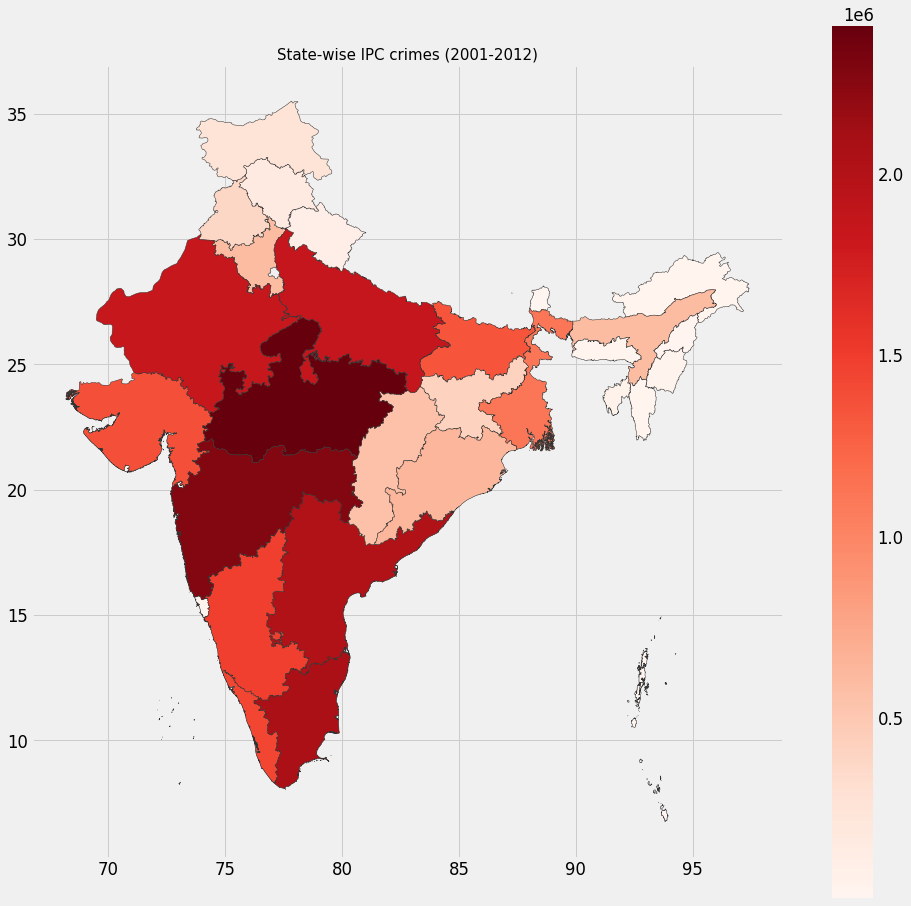

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title('State-wise IPC crimes (2001-2012)',fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='TOTAL IPC CRIMES', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

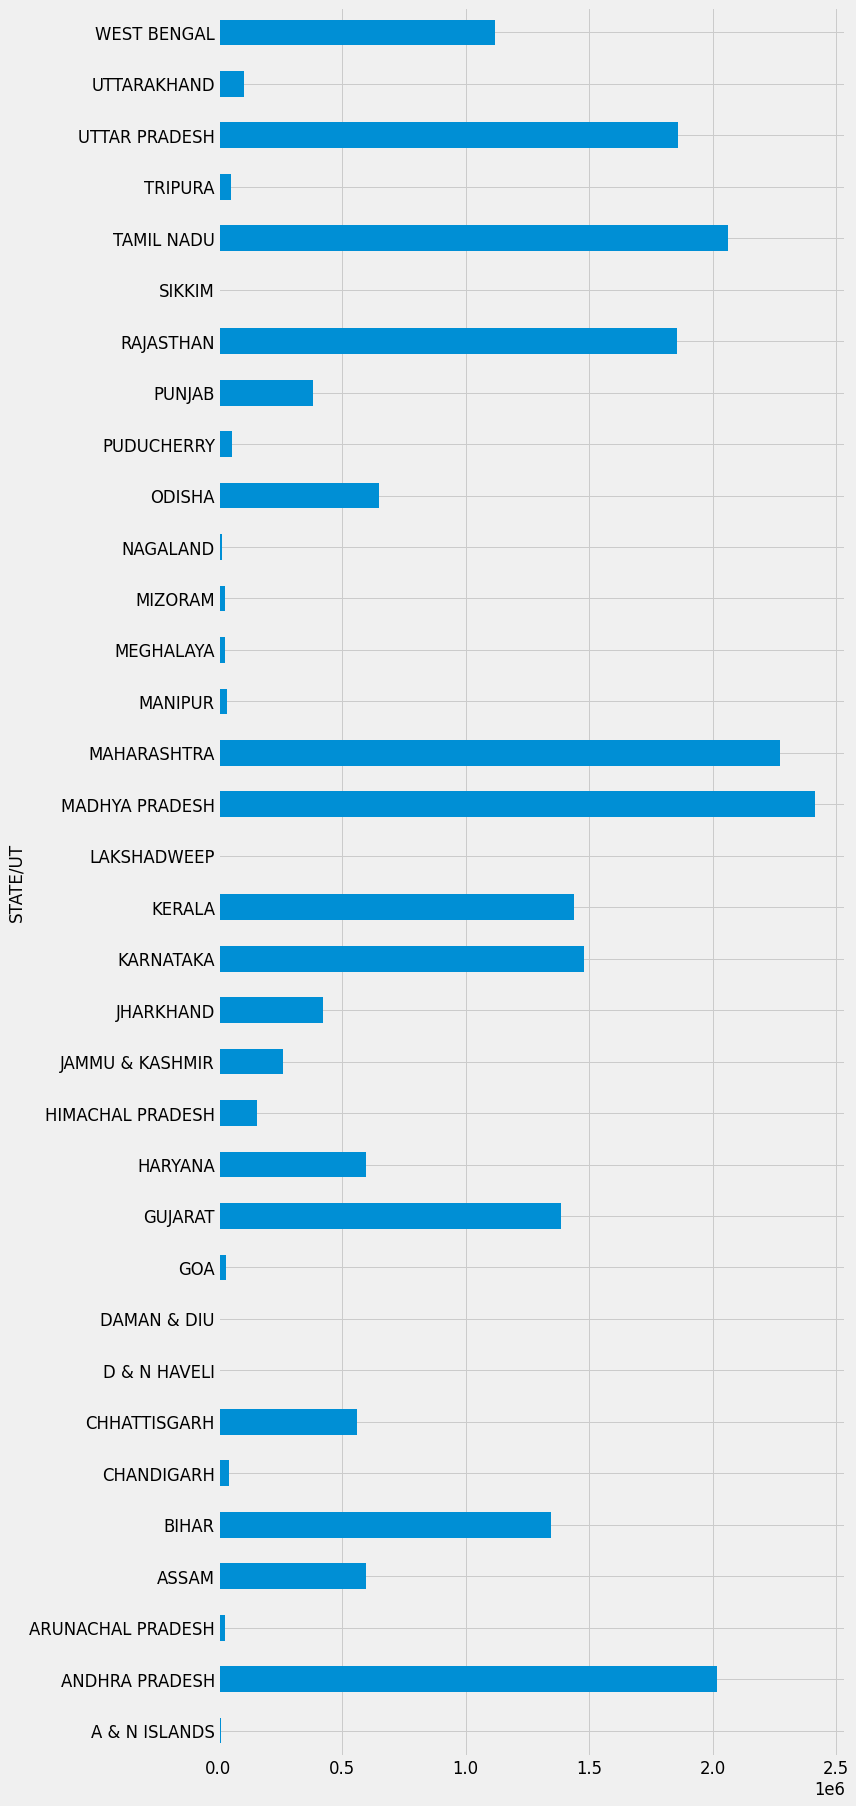

In [ ]:
fig1.set_index('STATE/UT',inplace=True)
fig1['TOTAL IPC CRIMES'].plot(kind='barh',figsize=(10,30))

In [ ]:
states=ind['state'].unique()

## Types of Crimes

In [ ]:
df.columns

Index(['STATE/UT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [ ]:
murder=df['MURDER'].sum()
rape=df['RAPE'].sum()
kidnapping=df['KIDNAPPING & ABDUCTION'].sum()
robbery=df['ROBBERY'].sum() 
riots=df['RIOTS'].sum() 
dacoity=df['DACOITY'].sum() 
burglary=df['BURGLARY'].sum() 
theft=df['THEFT'].sum() 
cheating=df['CHEATING'].sum() 
counterfieting=df['COUNTERFIETING'].sum() 
dowry=df['DOWRY DEATHS'].sum() 
others=df['TOTAL IPC CRIMES'].sum() - (murder+rape+kidnapping+robbery+riots+dacoity+burglary+theft+cheating+counterfieting+dowry)

In [ ]:
crime_type = ['Murder','Rape','Kidnapping','Robbery','Riots','Dacoity','Burglary','Theft','Cheating','Counterfieting','Dowry','Others']
crime_type_vals = [murder,rape,kidnapping,robbery,riots,dacoity,burglary,theft,cheating,counterfieting,dowry,others]

fig3 = go.Figure(data=[go.Pie(labels=crime_type, values=crime_type_vals,sort=False,marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])
fig3.update_layout(title='Major types of crime in India (2001 - 2012)')
fig3.show()

In [ ]:
 scy = df.groupby(['YEAR'])['MURDER', 'RAPE', 'KIDNAPPING & ABDUCTION',
        'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'RIOTS', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE'].sum().reset_index()

crimes = ['Murder', 'Rape',
       'Kidnapping and Abduction', 'Dacoity', 'Robbery','Burglary','Theft','Auto theft','Riots','Cheating','Counterfieting','Arson', 'Hurt',
       'Dowry','Assault on women','Insult to modesty of women','Cruelty by husband or relatives','Importation of girls from Foreign countries',
       'Causing death by negliegence']

fig = go.Figure()
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['MURDER'],
                    name='Murder',line=dict(color='pink', width=4)))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['RAPE'],
                    name='Rape',line=dict(color='green', width=4)))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['KIDNAPPING & ABDUCTION'],
                    name='Kidnapping and Abduction',line=dict(color='orange', width=4)))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['DACOITY'],
                    name='Dacoity',line=dict(color='yellow', width=4)))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['ROBBERY'],
                    name='Robbery',line=dict(color='black', width=4)))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['ARSON'],
                    name='Arson',line=dict(color='skyblue', width=4)))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['HURT/GREVIOUS HURT'],
                    name='Hurt',line=dict(color='royalblue', width=4)))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],
                    name='Assualt on women',line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['ROBBERY'],
                    mode='lines+markers',
                    name='Robbery'))
fig.add_trace(go.Scatter(x= scy['YEAR'], y= scy['CHEATING'],
                    name='Cheating',line=dict(color='red', width=4)))

fig.update_layout(uniformtext_minsize= 20,
    title_text="Types Crimes(2001-2012)",
    
                 )
    
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# Rape